Instruksi:

Pastikan proses & paparan mencakup: 
 - perumusan masalah, hipotesis, penentuan metodologi & variabel, analisis awal, analisis mendalam, kesimpulan & rekomendasi
 - Lakukan initial data assessment & pre-processing
 - Lakukan exploratory data analysis (EDA) untuk mengetahui konteks data secara umum & menyeluruh. Dari langkah ini, akan didapatkan aspek yang bisa dianalisis lebih dalam.
 - Berikan pertimbangan dan evaluasi beberapa opsi data model & usaha prediksi. Jelaskan secara detail dari aspek pemilihan variabel, feature engineering, dan hyper-parameter tuning.
 - Jelaskan kaitannya dengan konsep “wicked problem” untuk melakukan usaha terkait prediksi pola COVID-19

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
import plotly as py
import plotly.express as px
import numpy as np
plt.style.use('fivethirtyeight')

init_notebook_mode(connected=True)
%matplotlib inline

# Data Collection

## World Data
source : the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University

Field description
 - FIPS: US only. Federal Information Processing Standards code that uniquely identifies counties within the USA.
 - Admin2: County name. US only.
 - Province_State: Province, state or dependency name.
 - Country_Region: Country, region or sovereignty name. The names of locations included on the Website correspond with the official designations used by the  US. Department of State.
 - Last Update: MM/DD/YYYY HH:mm:ss (24 hour format, in UTC).
 - Lat and Long_: Dot locations on the dashboard. All points (except for Australia) shown on the map are based on geographic centroids, and are not  representative of a specific address, building or any location at a spatial scale finer than a province/state. Australian dots are located at the centroid of the largest city in each state.
 - Confirmed: Counts include confirmed and probable (where reported).
 - Deaths: Counts include confirmed and probable (where reported).
 - Recovered: Recovered cases are estimates based on local media reports, and state and local reporting when available, and therefore may be substantially lower than the true number. US state-level recovered cases are from COVID Tracking Project.
 - Active: Active cases = total cases - total recovered - total deaths.
 - Incident_Rate: Incidence Rate = cases per 100,000 persons.
 - Case_Fatality_Ratio (%): Case-Fatality Ratio (%) = Number recorded deaths / Number cases.

In [2]:
df = pd.read_csv('07-31-2021.csv')
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-08-01 04:21:50,33.93911,67.709953,146523,6677,82586.0,57260.0,Afghanistan,376.391586,4.556964
1,NaN,NaN,NaN,Albania,2021-08-01 04:21:50,41.15330,20.168300,133081,2457,130222.0,402.0,Albania,4624.400584,1.846244
2,NaN,NaN,NaN,Algeria,2021-08-01 04:21:50,28.03390,1.659600,171392,4254,115276.0,51862.0,Algeria,390.850453,2.482029
3,NaN,NaN,NaN,Andorra,2021-08-01 04:21:50,42.50630,1.521800,14678,128,14210.0,340.0,Andorra,18996.958519,0.872053
4,NaN,NaN,NaN,Angola,2021-08-01 04:21:50,-11.20270,17.873900,42777,1011,37255.0,4511.0,Angola,130.154723,2.363420


In [3]:
#melihat variabel data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3987 entries, 0 to 3986
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3266 non-null   float64
 1   Admin2               3271 non-null   object 
 2   Province_State       3813 non-null   object 
 3   Country_Region       3987 non-null   object 
 4   Last_Update          3987 non-null   object 
 5   Lat                  3899 non-null   float64
 6   Long_                3899 non-null   float64
 7   Confirmed            3987 non-null   int64  
 8   Deaths               3987 non-null   int64  
 9   Recovered            710 non-null    float64
 10  Active               709 non-null    float64
 11  Combined_Key         3987 non-null   object 
 12  Incident_Rate        3898 non-null   float64
 13  Case_Fatality_Ratio  3945 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 436.2+ KB


In [4]:
# melihat feature null
df.isnull().sum()

FIPS                    721
Admin2                  716
Province_State          174
Country_Region            0
Last_Update               0
Lat                      88
Long_                    88
Confirmed                 0
Deaths                    0
Recovered              3277
Active                 3278
Combined_Key              0
Incident_Rate            89
Case_Fatality_Ratio      42
dtype: int64

In [5]:
#agregasi data dengan menjumlahkan dan rata-rata
df_sum = df[['Country_Region','Confirmed', 'Deaths', 'Recovered', 'Active']].groupby('Country_Region').sum()
df_mean = df[['Country_Region','Incident_Rate', 'Case_Fatality_Ratio']].groupby('Country_Region').mean()
#menggabungkan data kedalam satu tabel
df_sum['Incident_Rate'] = df_mean['Incident_Rate']
df_sum['Case_Fatality_Ratio'] = df_mean['Case_Fatality_Ratio']
#tabel data keseluruhan terurut
df_global = df_sum.reset_index()
df_global = df_global.sort_values(['Confirmed', 'Deaths'], ascending=False).reset_index(drop=True)
df_global.style.background_gradient(cmap='Reds')

,Country_Region,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
0,US,34978276,613157,0.000000,0.000000,10481.253766,3.399600
1,India,31655824,424351,30820521.000000,410952.000000,3667.575970,1.260655
2,Brazil,19917855,556370,17771228.000000,1590257.000000,10971.576055,2.506184
3,France,6190334,112055,413170.000000,5665299.000000,5760.231722,0.841944
4,Russia,6185249,155952,5539787.000000,489510.000000,4138.409882,2.446262
5,United Kingdom,5883421,129949,20928.000000,5731831.000000,5333.032956,1.339530
6,Turkey,5727045,51332,5454360.000000,221353.000000,6790.500777,0.896309
7,Argentina,4929764,105721,4569552.000000,254491.000000,10907.576608,2.144545
8,Colombia,4785320,120723,4578519.000000,86078.000000,7462.470437,2.763371
9,Spain,4447044,81486,150376.000000,4215182.000000,9089.431069,1.822570


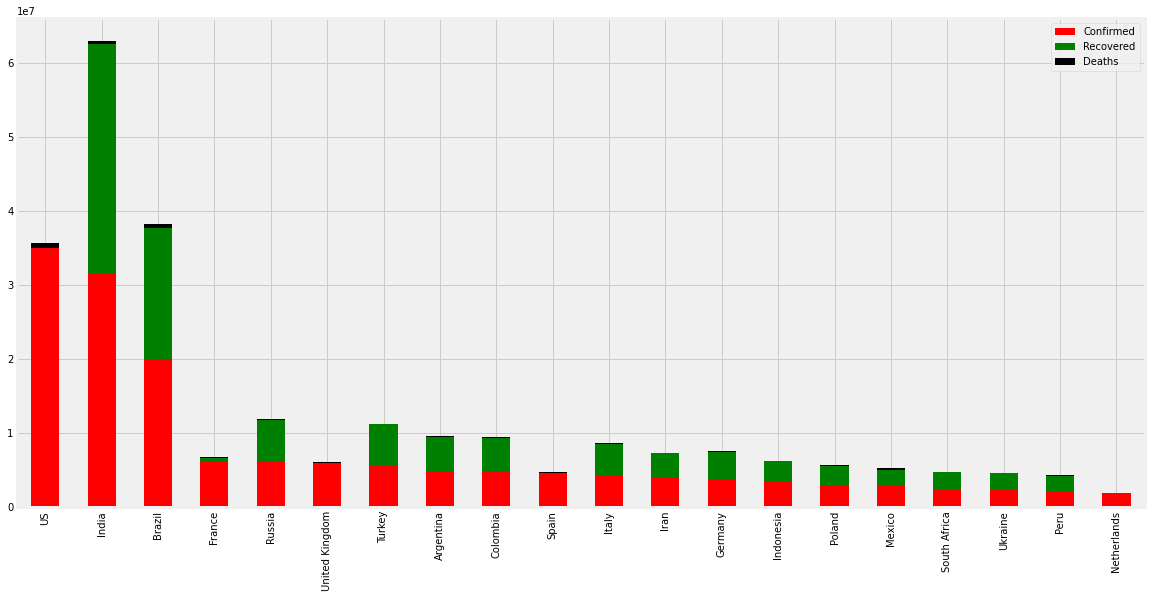

In [6]:
top20_world = df_global[:20]
top20_world[['Confirmed',  'Recovered', 'Deaths',]].plot(kind='bar', stacked=True, color=['r', 'g', 'k'], figsize=(18,9))
plt.xticks(ticks=np.arange(0,20), labels=list(top20_world['Country_Region']))
plt.show()
#plt.bar('Country_Region', ['Confirmed', 'Recovered', 'Deaths'], data=top20_world, stacked=True)

In [8]:
#plot data kedalam peta
fig = px.choropleth(
    df_global, #Dataframe
    locations= 'Country_Region', #Spatial coordinates, can give Lat and Lon in separate params
    locationmode= 'country names', #Type of spatial coordinates
    color= 'Confirmed', #Values to be color coded
    hover_name= 'Country_Region', #Text to be displayed in Bold upon hover
    hover_data= ['Confirmed', 'Case_Fatality_Ratio','Recovered','Deaths'], #Extra text to be displayed in Hover tip
    #animation_frame= 'Date', #Data for animation, time-series data
    #color_continuous_scale=px.colors.diverging.RdYlGn[::-1]
)

fig.update_layout(
    title_text =   "COVID-19 Confirmed Case in the World",
    title_x = 0.5,
    geo= dict(
        showframe= False,
        showcoastlines= False,
        projection_type = 'equirectangular'
    )
)
plot(fig)

'temp-plot.html'

# Time Series Data

In [9]:
confirmed_series = pd.read_csv('time_series_covid19_confirmed_global.csv')
death_series = pd.read_csv('time_series_covid19_deaths_global.csv')
recover_series = pd.read_csv('time_series_covid19_recovered_global.csv')

In [10]:
confirmed_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Columns: 561 entries, Province/State to 7/31/21
dtypes: float64(2), int64(557), object(2)
memory usage: 1.2+ MB


In [11]:
confirmed_series.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,143183,143439,143439,143439,144285,145008,145552,145996,146523,146523
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132797,132828,132853,132875,132891,132922,132952,132999,133036,133081
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,158213,159563,160868,162155,163660,165204,167131,168668,170189,171392
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14464,14498,14498,14498,14577,14586,14586,14655,14678,14678
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,41405,41629,41736,41780,41879,42110,42288,42486,42646,42777


In [12]:
#take datetime range feature
date_range = confirmed_series.columns[4:]

#total world case each day
confirm = []
death = []
recover = []
for date in date_range:
    confirm.append(confirmed_series[date].sum())
    death.append(death_series[date].sum())
    recover.append(recover_series[date].sum())

# adding increase number per day
def increase_rate(data):
    increase = []
    for i in range(len(data)):
        if i == 0:
            increase.append(data[i])
        else:
            increase.append(data[i] - data[i-1])
    return increase

world_daily = pd.DataFrame({'Date': date_range, 'Confirmed': confirm, 'Death': death, 'Recoveries' : recover})
#adding active, Case Fatality Ratio and increase
world_daily['Date'] = pd.to_datetime(world_daily['Date'])
world_daily['Active'] = world_daily['Confirmed'] - world_daily['Death'] - world_daily['Recoveries']
world_daily['Case_Fatality_Ratio'] = world_daily['Death'] / world_daily['Confirmed']
world_daily['confirmed_increase'] = increase_rate(world_daily['Confirmed'])

world_daily.head()

,Date,Confirmed,Death,Recoveries,Active,Case_Fatality_Ratio,confirmed_increase
0,2020-01-22,557,17,30,510,0.030521,557
1,2020-01-23,655,18,32,605,0.027481,98
2,2020-01-24,941,26,39,876,0.027630,286
3,2020-01-25,1433,42,42,1349,0.029309,492
4,2020-01-26,2118,56,56,2006,0.026440,685


Text(0.5, 0, 'Days')

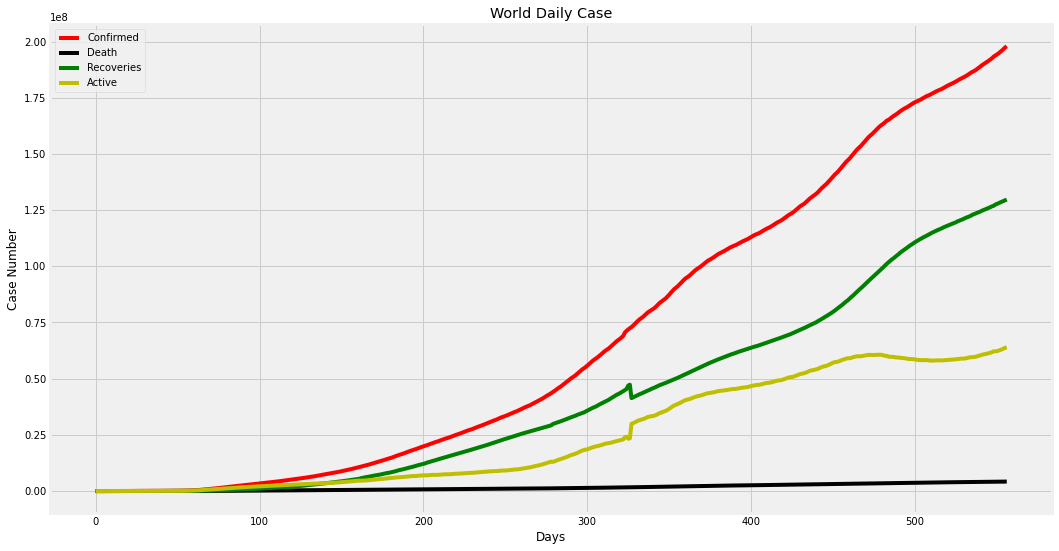

In [13]:
#plot world_daily case
world_daily[['Confirmed','Death', 'Recoveries', 'Active']].plot(color=['r', 'k', 'g', 'y'],figsize=(16, 9))
plt.title("World Daily Case")
plt.ylabel("Case Number")
plt.xlabel("Days")

Text(0.5, 0, 'Days')

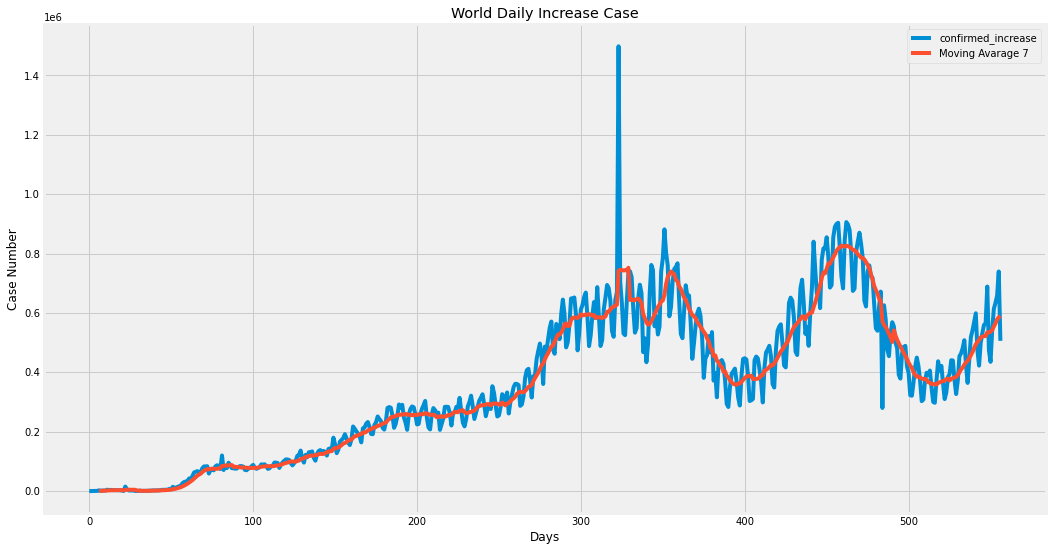

In [14]:
world_daily['confirmed_increase'].plot(figsize=(16, 9))
world_daily['confirmed_increase'].rolling(7).mean().plot(figsize=(16, 9), label='Moving Avarage 7')
plt.title("World Daily Increase Case")
plt.legend()
plt.ylabel("Case Number")
plt.xlabel("Days")

Text(0.5, 0, 'Days')

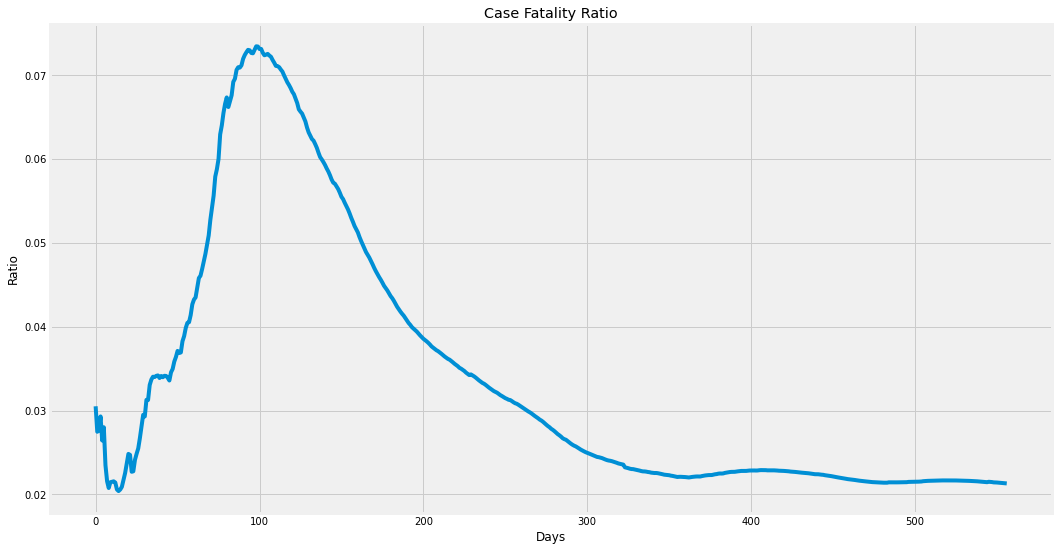

In [15]:
world_daily['Case_Fatality_Ratio'].plot(figsize=(16, 9))
plt.title("Case Fatality Ratio")
plt.ylabel("Ratio")
plt.xlabel("Days")

# Indoensia Time Series Case

In [16]:
confirm_ind_ser = confirmed_series[confirmed_series['Country/Region']=='Indonesia']
death_ind_ser = death_series[death_series['Country/Region']=='Indonesia']
recover_ind_ser = recover_series[recover_series['Country/Region']=='Indonesia']

def take_val(confirm_ind_ser):
    confirm_id = []
    date_range = confirm_ind_ser.columns[4:]
    for date in date_range:
        confirm_id.append(confirm_ind_ser[date].sum())
    return confirm_id


indo_daily = pd.DataFrame({'Date': pd.to_datetime(date_range), 
                            'Confirmed': take_val(confirm_ind_ser), 
                            'Death': take_val(death_ind_ser), 
                            'Recoveries' : take_val(recover_ind_ser)})

indo_daily['Active'] = indo_daily['Confirmed'] - indo_daily['Death'] - indo_daily['Recoveries']
indo_daily['Case_Fatality_Ratio'] = indo_daily['Death'] / indo_daily['Confirmed']
indo_daily['confirmed_increase'] = increase_rate(indo_daily['Confirmed'])
indo_daily = indo_daily.fillna(0) #bacause case fatality ratio contains 0 (0/0)

indo_daily.head()

,Date,Confirmed,Death,Recoveries,Active,Case_Fatality_Ratio,confirmed_increase
0,2020-01-22,0,0,0,0,0.0,0
1,2020-01-23,0,0,0,0,0.0,0
2,2020-01-24,0,0,0,0,0.0,0
3,2020-01-25,0,0,0,0,0.0,0
4,2020-01-26,0,0,0,0,0.0,0


Text(0.5, 0, 'Days')

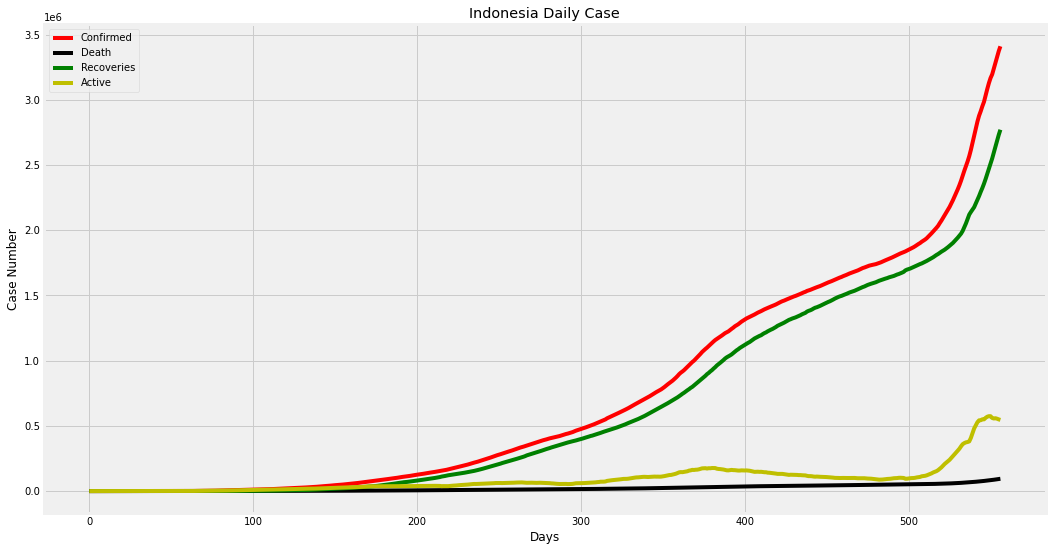

In [17]:
#plot indo_daily case
indo_daily[['Confirmed','Death', 'Recoveries', 'Active']].plot(color=['r', 'k', 'g', 'y'],figsize=(16, 9))
plt.title("Indonesia Daily Case")
plt.ylabel("Case Number")
plt.xlabel("Days")

Text(0.5, 0, 'Days')

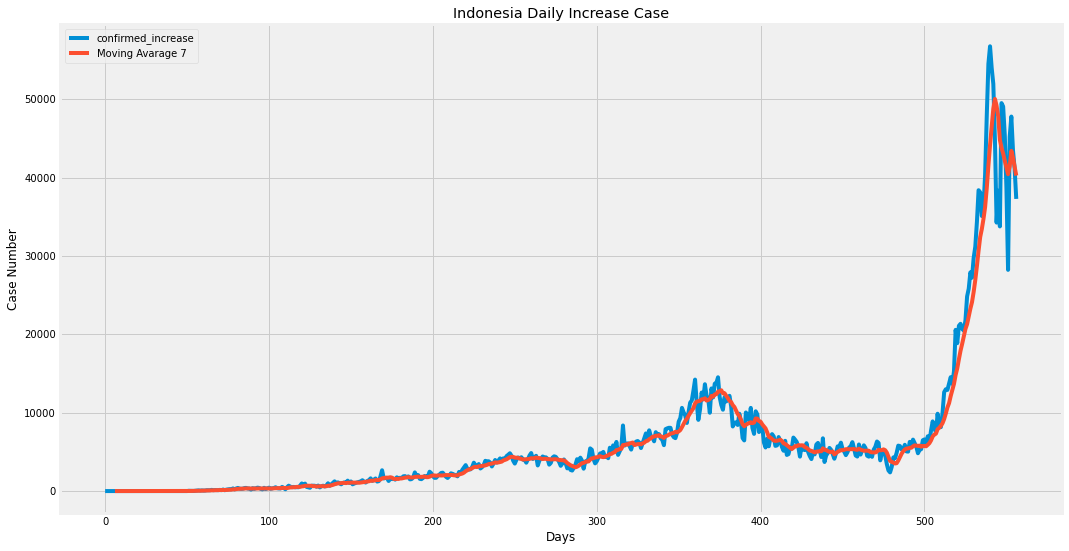

In [18]:
indo_daily['confirmed_increase'].plot(figsize=(16, 9))
indo_daily['confirmed_increase'].rolling(7).mean().plot(figsize=(16, 9), label='Moving Avarage 7')
plt.title("Indonesia Daily Increase Case")
plt.ylabel("Case Number")
plt.legend()
plt.xlabel("Days")

Text(0.5, 0, 'Days')

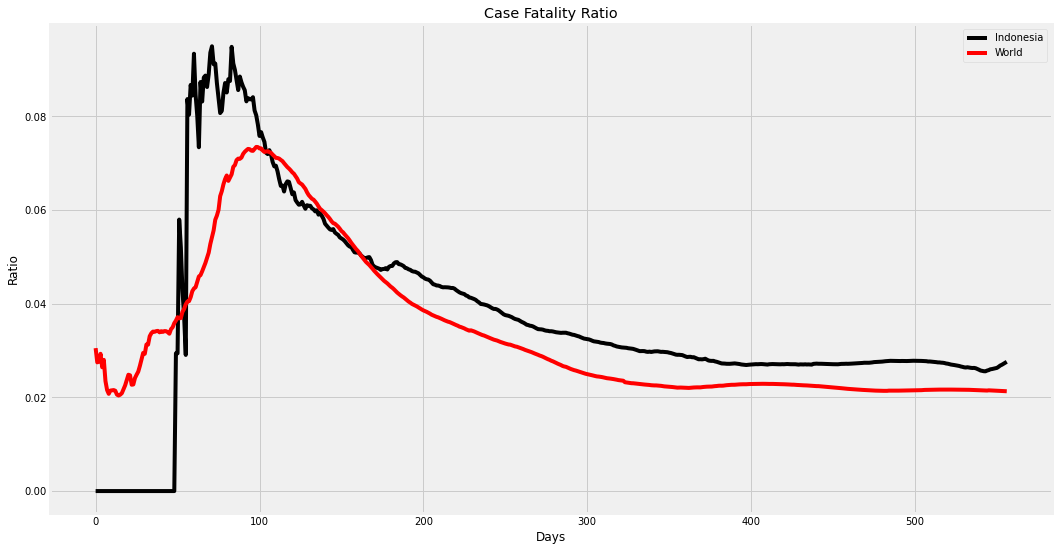

In [19]:
indo_daily['Case_Fatality_Ratio'].plot(figsize=(16, 9), color='k')
world_daily['Case_Fatality_Ratio'].plot(figsize=(16, 9), color='r')
plt.title("Case Fatality Ratio")
plt.legend(['Indonesia', 'World'])
plt.ylabel("Ratio")
plt.xlabel("Days")

# Vaksinasi

In [20]:
vaksinasi = pd.read_csv('vaccinations.csv')
vaksinasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37260 entries, 0 to 37259
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   location                             37260 non-null  object 
 1   iso_code                             37260 non-null  object 
 2   date                                 37260 non-null  object 
 3   total_vaccinations                   21864 non-null  float64
 4   people_vaccinated                    20981 non-null  float64
 5   people_fully_vaccinated              17916 non-null  float64
 6   daily_vaccinations_raw               18459 non-null  float64
 7   daily_vaccinations                   36992 non-null  float64
 8   total_vaccinations_per_hundred       21864 non-null  float64
 9   people_vaccinated_per_hundred        20981 non-null  float64
 10  people_fully_vaccinated_per_hundred  17916 non-null  float64
 11  daily_vaccinations_per_milli

In [21]:
#vaksinasi pada setiap negara di dunia
vaksinasi.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


Text(0.5, 0, 'Since 2021-02-22')

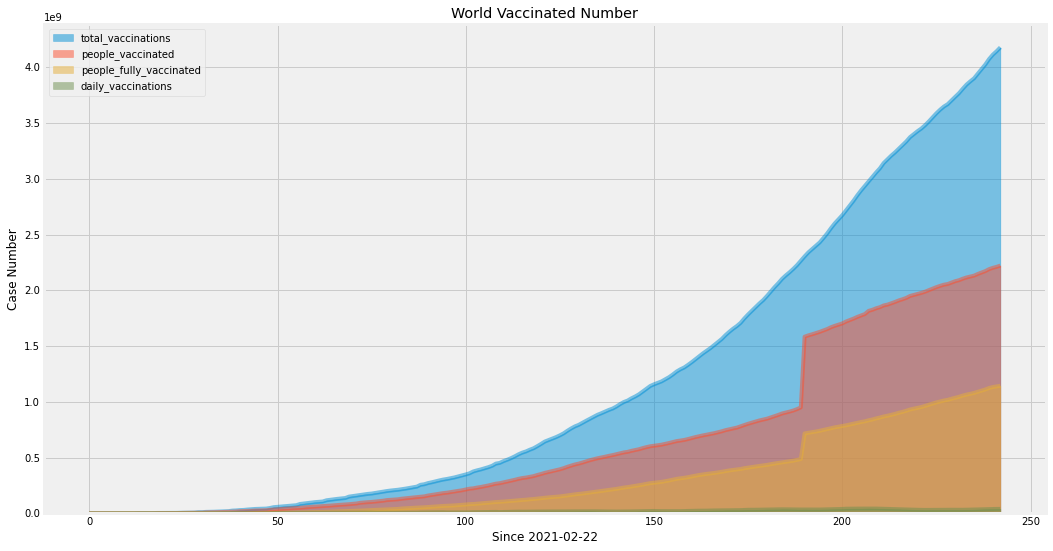

In [22]:
world_vac = vaksinasi[vaksinasi['location']=='World'].reset_index()

world_vac[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations']].plot.area(figsize=(16, 9), stacked=False)
plt.title("World Vaccinated Number")
plt.ylabel("Case Number")
plt.xlabel("Since 2021-02-22")

Text(0.5, 0, 'Days')

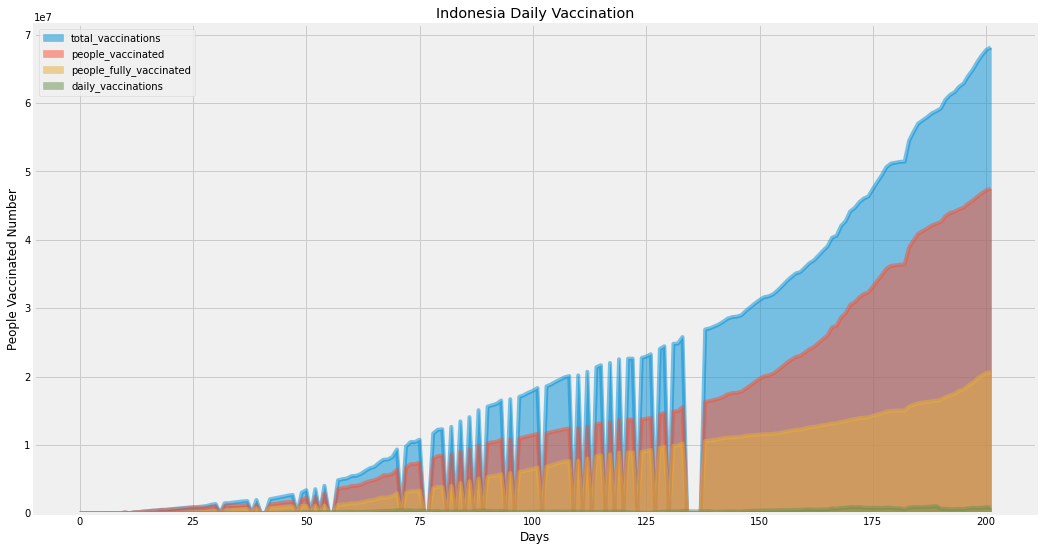

In [23]:
world_vac = vaksinasi[vaksinasi['location']=='Indonesia'].reset_index()

world_vac[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations']].plot.area(figsize=(16, 9), stacked=False)
plt.title("Indonesia Daily Vaccination")
plt.ylabel("People Vaccinated Number")
plt.xlabel("Days")

In [24]:
#plot data kedalam peta
fig = px.choropleth(
    vaksinasi.sort_values('date'), #Dataframe
    locations= 'location', #Spatial coordinates, can give Lat and Lon in separate params
    locationmode= 'country names', #Type of spatial coordinates
    color= 'people_vaccinated', #Values to be color coded
    hover_name= 'location', #Text to be displayed in Bold upon hover
    hover_data= ['total_vaccinations', 'daily_vaccinations'], #Extra text to be displayed in Hover tip
    animation_frame= 'date', #Data for animation, time-series data
    color_continuous_scale=px.colors.diverging.RdYlGn[::-1]
)

fig.update_layout(
    title_text =   "COVID-19 Vaccination",
    title_x = 0.5,
    geo= dict(
        showframe= False,
        showcoastlines= False,
        projection_type = 'equirectangular'
    )
)
plot(fig)

'temp-plot.html'

# Indonesia Mobility Data

In [25]:
mobil = pd.read_csv('2020_ID_Region_Mobility_Report.csv')
mobil_sort = mobil.sort_values('date').reset_index(drop=True)
mobil_sort

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-02-15,-2.0,-2.0,-8.0,1.0,5,1
1,ID,Indonesia,West Papua,NaN,NaN,ID-PB,NaN,ChIJLQviub0KVC0RYsvHxfjBSVM,2020-02-15,3.0,2.0,6.0,2.0,12,1
2,ID,Indonesia,South Sumatra,NaN,NaN,ID-SS,NaN,ChIJLeo1PXWLEC4Rz8QB4gGB_Bg,2020-02-15,-3.0,-2.0,-4.0,2.0,4,1
3,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2020-02-15,2.0,3.0,16.0,5.0,6,0
4,ID,Indonesia,Riau,NaN,NaN,ID-RI,NaN,ChIJdz6xGVhXJy4Rsb21bJQCb4M,2020-02-15,-1.0,-2.0,-2.0,-2.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11230,ID,Indonesia,Central Java,NaN,NaN,ID-JT,NaN,ChIJ3RjVnJt1ZS4RRrztj53Rd8M,2020-12-31,5.0,31.0,18.0,-2.0,-41,12
11231,ID,Indonesia,South Sumatra,NaN,NaN,ID-SS,NaN,ChIJLeo1PXWLEC4Rz8QB4gGB_Bg,2020-12-31,-2.0,25.0,38.0,-15.0,-46,10
11232,ID,Indonesia,East Kalimantan,NaN,NaN,ID-KI,NaN,ChIJkZxNlhBH8S0R13bjLx2wq8Q,2020-12-31,-5.0,27.0,-3.0,-15.0,-38,6
11233,ID,Indonesia,Papua,NaN,NaN,ID-PA,NaN,ChIJc5L_qgQsO2gRc-bvXpxOqes,2020-12-31,-2.0,35.0,40.0,-11.0,-39,0


In [26]:
mobil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11235 entries, 0 to 11234
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region_code                                 11235 non-null  object 
 1   country_region                                      11235 non-null  object 
 2   sub_region_1                                        10914 non-null  object 
 3   sub_region_2                                        0 non-null      float64
 4   metro_area                                          0 non-null      float64
 5   iso_3166_2_code                                     10914 non-null  object 
 6   census_fips_code                                    0 non-null      float64
 7   place_id                                            11235 non-null  object 
 8   date                                                11235 non-null  object 


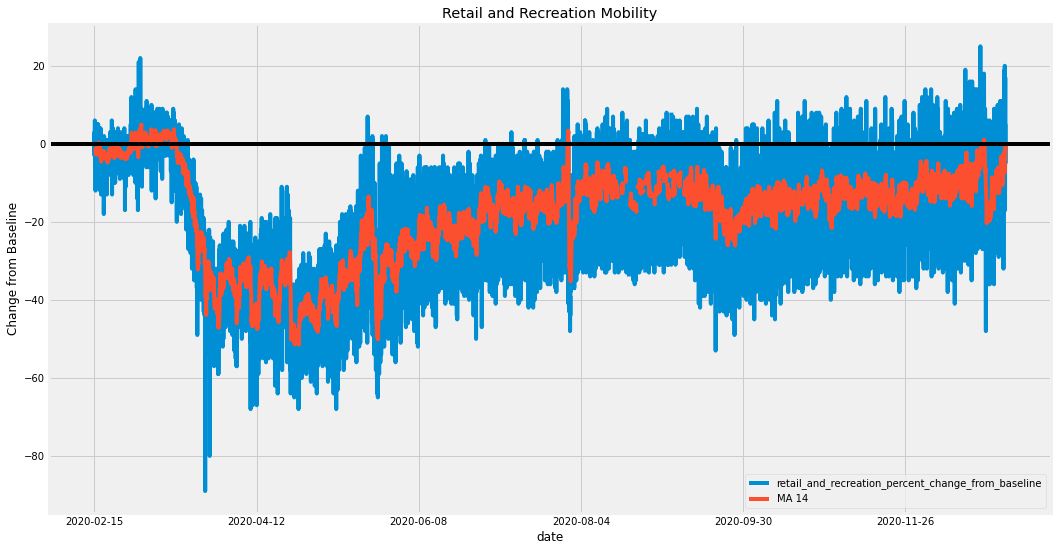

In [27]:
def plot_mobil(kolom, judul):
    mobil_sort.plot(x='date', y=kolom,figsize=(16, 7))
    mobil_sort[kolom].rolling(14).mean().plot(figsize=(16, 9), label='MA 14')
    plt.axhline(0, color='k')
    plt.title(judul)
    plt.ylabel('Change from Baseline')
    plt.legend()
    plt.show()

plot_mobil("retail_and_recreation_percent_change_from_baseline", "Retail and Recreation Mobility")

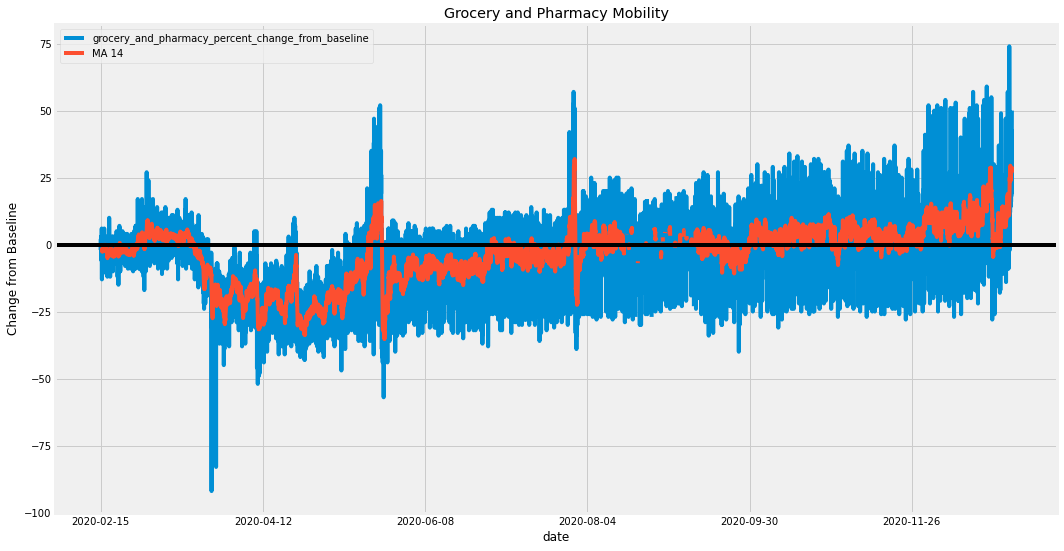

In [28]:
plot_mobil("grocery_and_pharmacy_percent_change_from_baseline", "Grocery and Pharmacy Mobility")

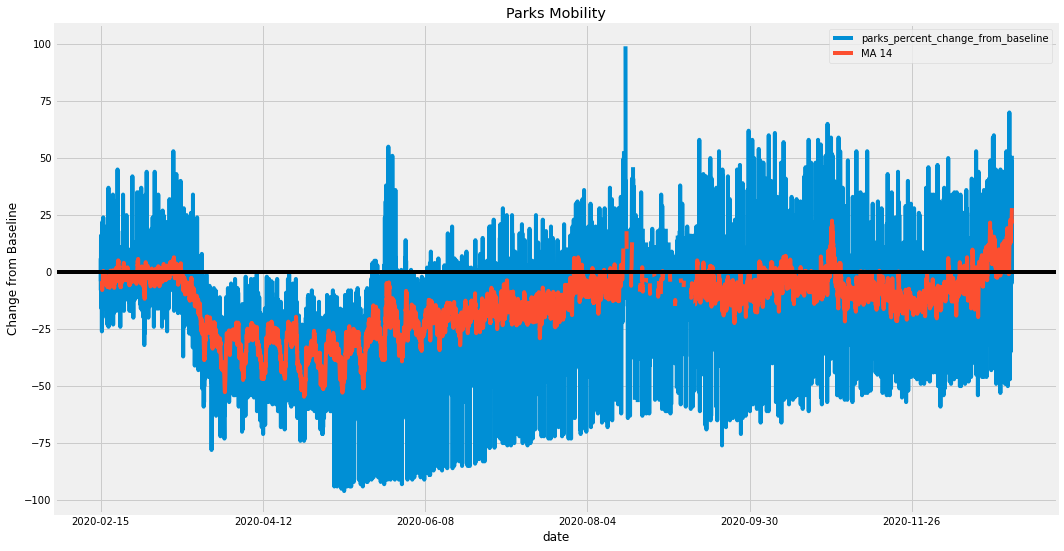

In [29]:
plot_mobil("parks_percent_change_from_baseline", "Parks Mobility")

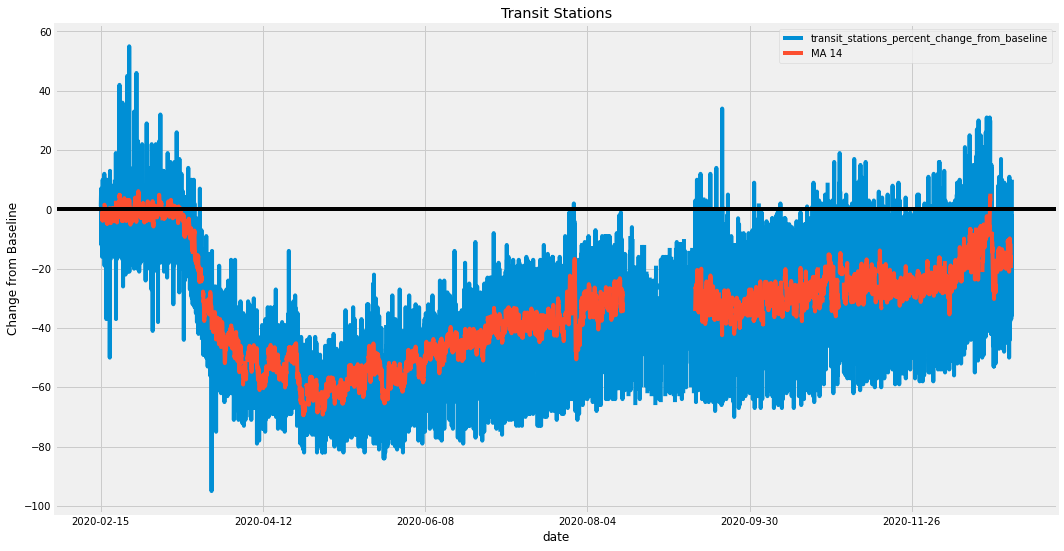

In [30]:
plot_mobil("transit_stations_percent_change_from_baseline", "Transit Stations")

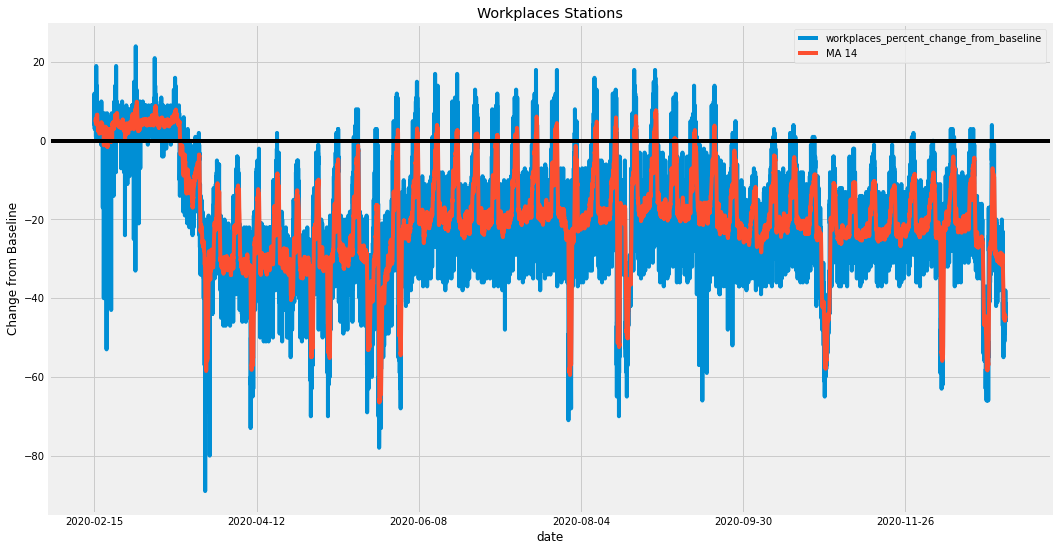

In [31]:
plot_mobil("workplaces_percent_change_from_baseline", "Workplaces Stations")

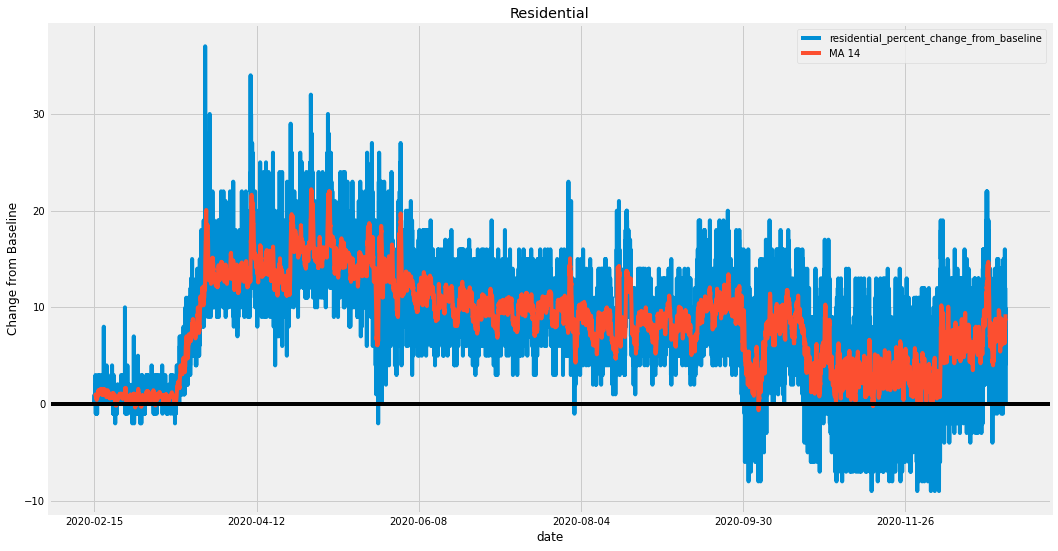

In [32]:
plot_mobil("residential_percent_change_from_baseline", "Residential")


# COVID-19 Machine Learning Modelling (Indonesia Study Case)

In [33]:
indo_daily

,Date,Confirmed,Death,Recoveries,Active,Case_Fatality_Ratio,confirmed_increase
0,2020-01-22,0,0,0,0,0.000000,0
1,2020-01-23,0,0,0,0,0.000000,0
2,2020-01-24,0,0,0,0,0.000000,0
3,2020-01-25,0,0,0,0,0.000000,0
4,2020-01-26,0,0,0,0,0.000000,0
...,...,...,...,...,...,...,...
552,2021-07-27,3239936,86835,2596820,556281,0.026801,45203
553,2021-07-28,3287727,88659,2640676,558392,0.026967,47791
554,2021-07-29,3331206,90552,2686170,554484,0.027183,43479
555,2021-07-30,3372374,92311,2730720,549343,0.027373,41168


In [34]:
from sklearn.model_selection import train_test_split
import numpy as np

#blind data test 20 hari
data_model = indo_daily[:-20]

X_test = np.arange(min(indo_daily[-20:].index), max(indo_daily[-20:].index)+1).reshape(-1,1)
y_test = indo_daily[-20:].Confirmed

#data untuk model
X = np.arange(len(data_model)).reshape(-1,1)
y = data_model.Confirmed

#split data untuk training dan validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=False, test_size=0.1)

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

## Polynomial Model

In [36]:
#Polynomial feature
for i in range(5):
    lr = LinearRegression()
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    score = cross_val_score(lr, X_train_poly, y_train, scoring='neg_mean_absolute_error')

    lr.fit(X_train_poly, y_train)
    
    val_score = mean_squared_error(y_val, lr.predict(X_val_poly))

    score_mean = np.mean(np.absolute(score))
    print(f'degree:{i} training score dari 5 fold CV: {score_mean} val_score: {val_score}')

degree:0 training score dari 5 fold CV: 613373.8245313119 val_score: 2265266729709.105
degree:1 training score dari 5 fold CV: 370537.5252182378 val_score: 241142332812.06757
degree:2 training score dari 5 fold CV: 55533.14818829908 val_score: 42803575811.338036
degree:3 training score dari 5 fold CV: 141061.2137204671 val_score: 44506884103.43096
degree:4 training score dari 5 fold CV: 191320.3627014503 val_score: 45559074570.59069


In [37]:
poly = PolynomialFeatures(degree=3) #orde 3 better result
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [38]:
#date range for better viz
X_val_date = data_model.loc[min(X_val).item():max(X_val).item()]['Date']
X_train_date = data_model.loc[min(X_train).item():max(X_train).item()]['Date']

X_test_date = indo_daily.loc[min(X_test).item():max(X_test).item()]['Date']

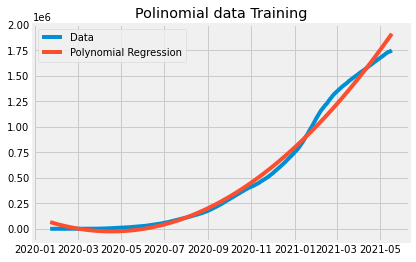

In [39]:
plt.plot(data_model[:len(X_train)]['Date'], y_train, label='Data')
plt.plot(data_model[:len(X_train)]['Date'], lr.predict(X_train_poly), label='Polynomial Regression')
plt.title('Polinomial data Training')
plt.legend()

MSE SCORE


44506884103.43096

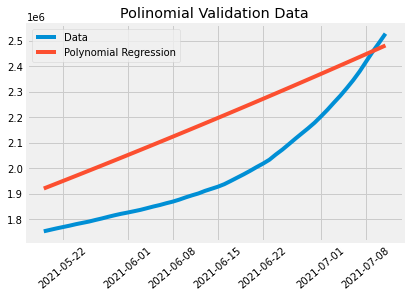

In [40]:
plt.plot(X_val_date, y_val, label='Data')
plt.plot(X_val_date, lr.predict(X_val_poly), label='Polynomial Regression')
plt.title('Polinomial Validation Data')
plt.xticks(rotation=40)

plt.legend()
print('MSE SCORE');
mean_squared_error(y_val, lr.predict(X_val_poly))

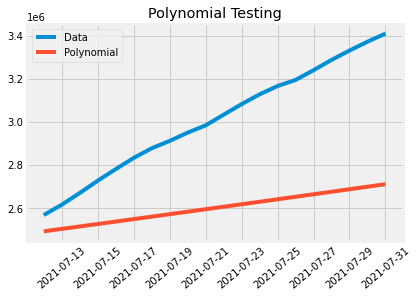

In [41]:
def plot_testing(model, X_test, label, judul):
    plt.plot(X_test_date, y_test, label='Data')
    plt.plot(X_test_date, model.predict(X_test), label=label)
    plt.title(judul)
    plt.xticks(rotation=40)
    plt.legend()
    plt.show()

plot_testing(lr, X_test_poly, 'Polynomial', 'Polynomial Testing')

## SVR Model

In [42]:
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)

mean_squared_error(y_train, svm.predict(X_train))

404371069235.8029

In [43]:
#tuning parameter SVM
c = [0.01, 0.1, 1]

svm_grid = {'C': c}

svm = SVR(kernel='poly')
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, verbose=1)
svm_search.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning:

The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.



Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=SVR(kernel='poly'), n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [44]:
svm_search.best_params_

{'C': 1}

In [45]:
svm = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=1)
svm.fit(X_train, y_train)

SVR(C=1, epsilon=1, gamma=0.01, kernel='poly')

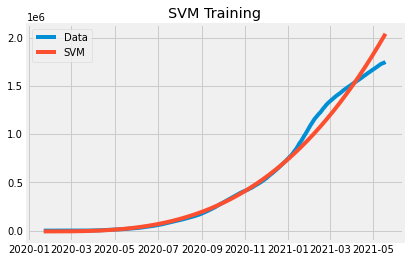

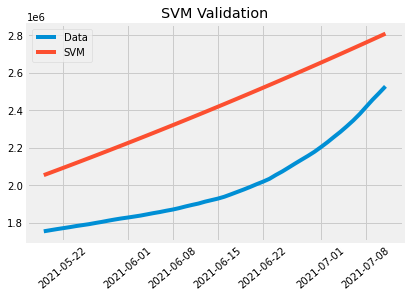

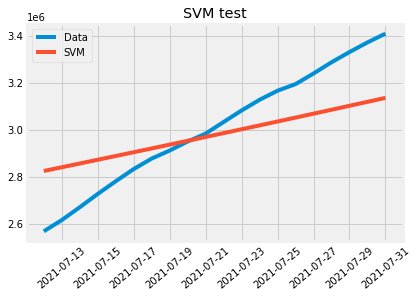

In [46]:
def plot_training(model, label, judul):
    plt.plot(data_model[:len(X_train)]['Date'], y_train, label='Data')
    plt.plot(data_model[:len(X_train)]['Date'], model.predict(X_train), label=label)
    plt.title(judul)
    plt.legend()
    plt.show()

def plot_validation(model, label, judul):
    plt.plot(X_val_date, y_val, label='Data')
    plt.plot(X_val_date, model.predict(X_val), label=label)
    plt.title(judul)
    plt.xticks(rotation=40)

    plt.title(judul)
    plt.legend()
    plt.show()

plot_training(svm, 'SVM', 'SVM Training')
plot_validation(svm, 'SVM', 'SVM Validation')
plot_testing(svm, X_test, 'SVM', 'SVM test')

# KNN Regressor

In [47]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

mean_squared_error(y_train, knn.predict(X_train))

316971.99246376613

In [48]:
#tuning parameter SVM
n_neighbors = [4, 5, 6, 7, 8, 9, 10]
knn_grid = {'n_neighbors': n_neighbors}

knn = KNeighborsRegressor(n_neighbors=5)
knn_search = RandomizedSearchCV(knn, knn_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, verbose=1)
knn_search.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning:

The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.



RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
                   param_distributions={'n_neighbors': [4, 5, 6, 7, 8, 9, 10]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [49]:
knn_search.best_estimator_

KNeighborsRegressor(n_neighbors=4)

In [50]:
knn = KNeighborsRegressor(n_neighbors=14)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=14)

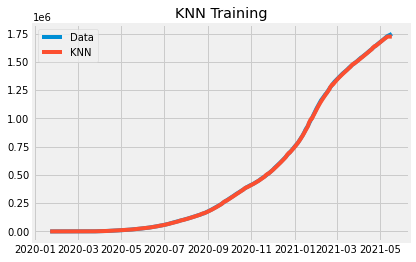

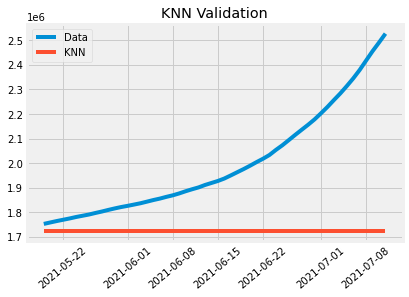

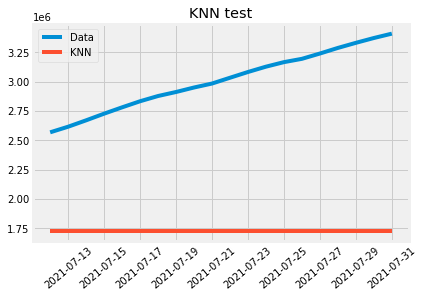

In [51]:
plot_training(knn, 'KNN', 'KNN Training')
plot_validation(knn, 'KNN', 'KNN Validation')
plot_testing(knn, X_test, 'KNN', 'KNN test')

In [52]:
print(f'KNN MSE SCORE DATA Train {mean_squared_error(y_train, knn.predict(X_train))}')
print(f'LR MSE SCORE DATA train {mean_squared_error(y_train, lr.predict(X_train_poly))}')
print(f'SVM MSE SCORE DATA train {mean_squared_error(y_train, svm.predict(X_train))}')

KNN MSE SCORE DATA Train 10230572.267577225
LR MSE SCORE DATA train 2817236661.463918
SVM MSE SCORE DATA train 4470975627.911643


In [53]:
print(f'KNN MSE SCORE DATA val {mean_squared_error(y_val, knn.predict(X_val))}')
print(f'LR MSE SCORE DATA val {mean_squared_error(y_val, lr.predict(X_val_poly))}')
print(f'SVM MSE SCORE DATA val {mean_squared_error(y_val, svm.predict(X_val))}')

KNN MSE SCORE DATA val 121584502479.64815
LR MSE SCORE DATA val 44506884103.43096
SVM MSE SCORE DATA val 180705711346.33078


In [54]:
print(f'KNN MSE SCORE DATA TEST {mean_squared_error(y_test, knn.predict(X_test))}')
print(f'LR MSE SCORE DATA TEST {mean_squared_error(y_test, lr.predict(X_test_poly))}')
print(f'SVM MSE SCORE DATA TEST {mean_squared_error(y_test, svm.predict(X_test))}')

KNN MSE SCORE DATA TEST 1714952720094.65
LR MSE SCORE DATA TEST 200260378708.5125
SVM MSE SCORE DATA TEST 25587353568.534786
